#  <font color='red'> Review of 1D distributions </font>


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd /content/drive/MyDrive/Colab\ Notebooks/aml2024-students-copy/MiniAssignments/ma02_1DGaussian

/content/drive/MyDrive/Colab Notebooks/aml2024-students-copy/MiniAssignments/ma02_1DGaussian


In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy
from scipy.stats import multivariate_normal
from sklearn.preprocessing import PowerTransformer
from scipy.special import boxcox, inv_boxcox


## Plot Gaussian PDF


You may vary the parameters and see how the plots change

The following code represents the equation of Gaussian Distribution:
    $$N(x|\mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}\exp(\frac{-\delta^2}{2})$$

where $$\delta = \frac{x-\mu}{\sigma}$$

<font color=red>Add your code below </font>


0.9999999999988348

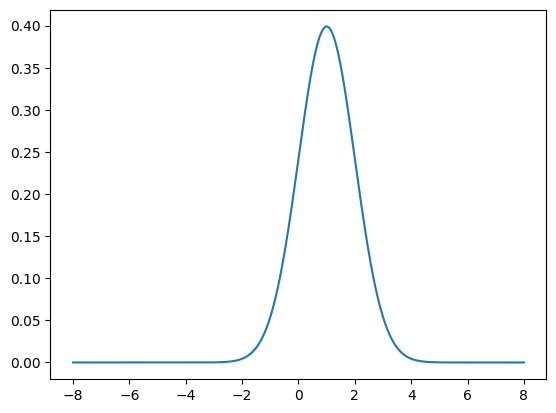

In [2]:
# Parameters of the Gaussian

mu = 1      # mean
sigma = 1 # standard deviation

Nsamples = 600  # Sample size
x = np.linspace(-8, 8, Nsamples)    # Hover over "linspace" to see detailed explanation
Deltax = x[1]-x[0]

# MODIFY YOUR CODE BELOW. It is set as 0 so that the code will execute
pdf = multivariate_normal.pdf(x, mu, sigma)

# Plot of the Gaussian PDF
s = plt.plot(x, pdf)

# Check if the integral ~ 1
sum(pdf)*Deltax

## Draw samples from the distribution and plot

See https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

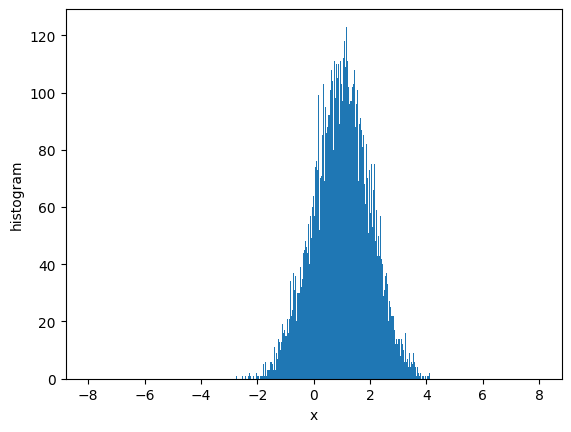

In [3]:
N=10000

s = np.random.normal(mu, sigma, N)
pt = plt.hist(s, bins=x)
pt = plt.xlabel('x')
pt = plt.ylabel('histogram')



# Non-linear transformation of random variables

The probability distribution of random variables can be changed by applying a non-linear transformation to the data. The pdf of the transformed data can be obtained analytically, if the transformation is invertible.

Box-Cox transformation is often used to transform a non-Gaussian PDF to Gaussian

$$y_{\lambda}(x) = \left\{\begin{array}{ccc}\frac{x^{\lambda}-1}{\lambda}& \mbox{ if }& \lambda\neq 0\\
\log(x) & \mbox{else}\end{array}\right.$$

The inverse for this transformation is given by
$$x_{\lambda}(y) = \left\{\begin{array}{ccc} \left(\lambda y+1\right)^{1/\lambda}& \mbox{ if }& \lambda\neq 0\\
\exp(y) & \mbox{else}\end{array}\right.$$

We will consider an example, where the optimal lambda of the transformation is estimated from the data.

Text(0.5, 1.0, 'Inverse Box-Cox')

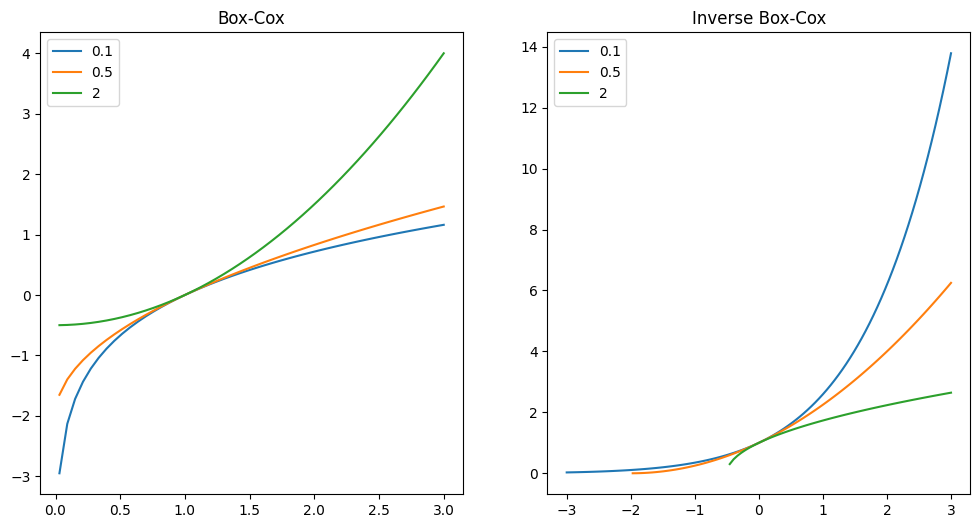

In [5]:
x = np.linspace(-3,3,100)
plt.figure(figsize=(12,6))
plt.subplot(121)
lam=0.1
plt.plot(x,boxcox(x,lam),label=str(lam))
lam=0.5
plt.plot(x,boxcox(x,lam),label=str(lam))
lam=2
plt.plot(x,boxcox(x,lam),label=str(lam))
s = plt.legend()
plt.title("Box-Cox")

x = np.linspace(-3,3,100)
plt.subplot(122)
lam=0.1
plt.plot(x,inv_boxcox(x,lam),label=str(lam))
lam=0.5
plt.plot(x,inv_boxcox(x,lam),label=str(lam))
lam=2
plt.plot(x,inv_boxcox(x,lam),label=str(lam))
s = plt.legend()
plt.title("Inverse Box-Cox")

We will draw samples from a log normal distribution and use scipy box-cox fitting to estimate the lambda. The transformation will convert the original pdf to a Gaussian PDF.

## Transform Log-normal distribution to Gaussian distribution

Use scikit power transformer to fit a box-cox function to the given log-normal distribution. This essentially involves an optimization process to determine the $\lambda$ value of the box-cox function. The optimal lambda is determined such that the transformed samples are unit Gaussian

Once learned, the corresponding box-cox function can non-linearly map the samples of the log-normal distribution. The transformed samples will appear Gaussian



Text(0.5, 1.0, 'Transformed')

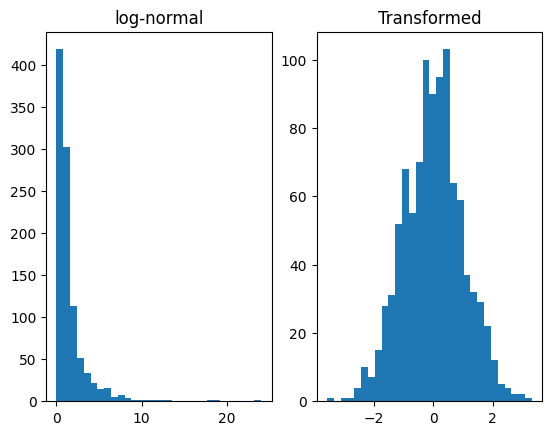

In [6]:
boxcox = PowerTransformer(method="box-cox")
rng = np.random.default_rng(seed=42)

# lognormal distribution
X_lognormal = rng.lognormal(size=(1000,1))

transformed = boxcox.fit(X_lognormal).transform(X_lognormal)
lambda_bc = boxcox.lambdas_[0]

plt.subplot(121)
s=plt.hist(X_lognormal, bins=30)
plt.title('log-normal')
plt.subplot(122)
s=plt.hist(transformed, bins=30)
plt.title('Transformed')


## Transform Gaussian to log-normal distribution

Use the inverse of the previously fitted box-cox function to transform a Gaussian distribution to log-normal distribution. Here, we are generating fake data, whose pdf is similar to the original samples that follow a log-normal distribution

<font color=red>Modify your code below </font>


Text(0.5, 1.0, 'Transformed')

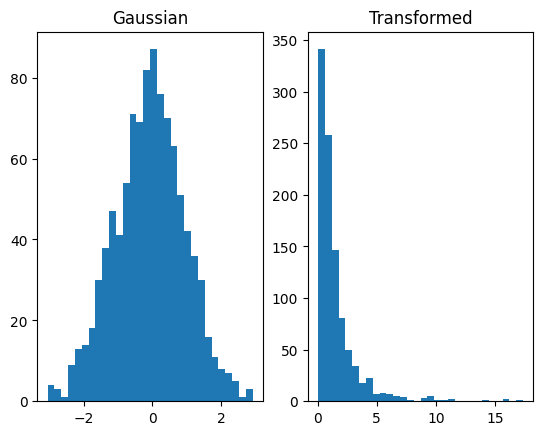

In [7]:
GaussianSamples = rng.normal(size=(1000,1))
plt.subplot(121)
s=plt.hist(GaussianSamples, bins=30)

# Modify the line below
transformed = (GaussianSamples * lambda_bc + 1) ** (1 / lambda_bc)
plt.title('Gaussian')
plt.subplot(122)
s=plt.hist(transformed, bins=30)
plt.title('Transformed')